# CarDekho - Car Price Prediction Project

__Importing Required Libraries__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

## Step-1: Data Understanding and routine check

In [2]:
cardata = pd.read_excel('Cardekho dataset.xlsx')
cardata.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [3]:
cardata.shape

(8128, 12)

In [4]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


Our Target variable here is selling_price

## Step-2: Data Cleaning & EDA

__Checking Missing Values__

In [5]:
(cardata.isnull().sum()/len(cardata))*100

name                  0.000000
year                  0.000000
selling_price         0.000000
km_driven             0.000000
fuel                  0.000000
seller_type           0.000000
transmission          0.000000
owner                 0.000000
mileage(km/ltr/kg)    2.718996
engine                2.718996
max_power             2.645177
seats                 2.718996
dtype: float64

Looks like there are few missing values in Mileage, engine, max_power, seats columns

In [6]:
cardata['max_power'] = cardata['max_power'].replace({" ": np.NaN})

Dropping Missing values

In [7]:
cardata.dropna(inplace=True)

In [8]:
(cardata.isnull().sum()/len(cardata))*100

name                  0.0
year                  0.0
selling_price         0.0
km_driven             0.0
fuel                  0.0
seller_type           0.0
transmission          0.0
owner                 0.0
mileage(km/ltr/kg)    0.0
engine                0.0
max_power             0.0
seats                 0.0
dtype: float64

In [9]:
cardata.shape

(7906, 12)

In [10]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                7906 non-null   object 
 1   year                7906 non-null   int64  
 2   selling_price       7906 non-null   int64  
 3   km_driven           7906 non-null   int64  
 4   fuel                7906 non-null   object 
 5   seller_type         7906 non-null   object 
 6   transmission        7906 non-null   object 
 7   owner               7906 non-null   object 
 8   mileage(km/ltr/kg)  7906 non-null   float64
 9   engine              7906 non-null   float64
 10  max_power           7906 non-null   float64
 11  seats               7906 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 803.0+ KB


In [11]:
cardata.drop(columns=['name'], inplace=True)

In [12]:
cardata['year'] = cardata['year'].astype('object')

In [13]:
cardata.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


__Dividing columns into numeric and categorical list for further analysis__

In [14]:
cat_cols = ['year','fuel','seller_type','transmission','owner']
num_cols = ['selling_price','km_driven','mileage(km/ltr/kg)','engine','max_power','seats']

#### Inspecting Target variable

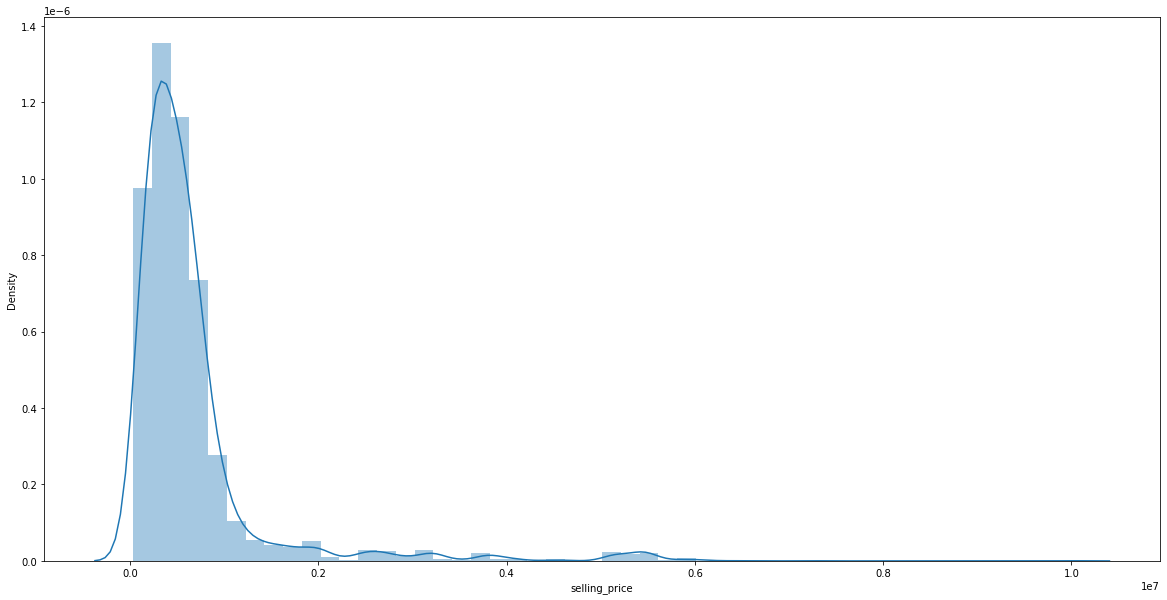

In [15]:
plt.figure(figsize = [20,10])

sns.distplot(cardata['selling_price'])
plt.show()

### Analysis of Categorical Variables

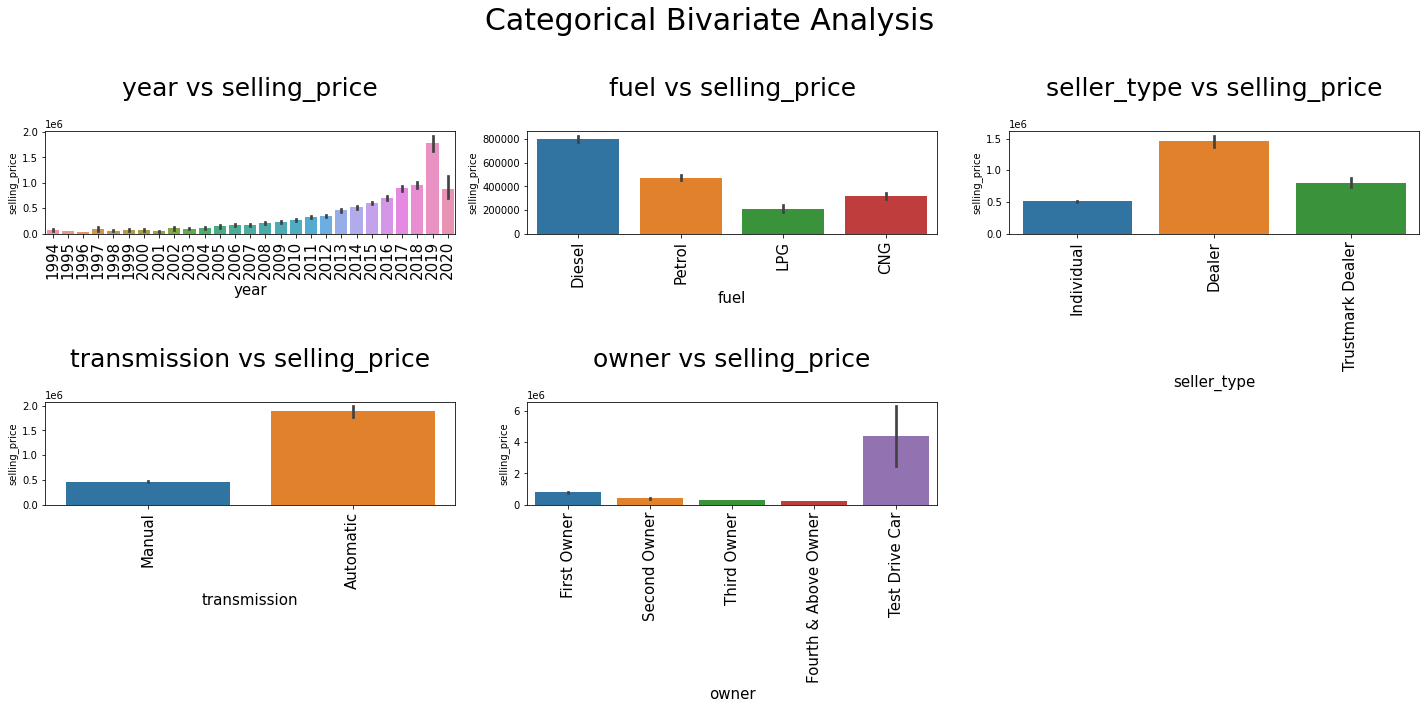

In [16]:
plt.figure(figsize = [20,10])
plt.suptitle('Categorical Bivariate Analysis\n', fontsize=30)
i=1
for col in cat_cols:
        plt.subplot(2,3,i)
        sns.barplot(x=cardata[col],y=cardata['selling_price'])
        plt.title(f'{col} vs selling_price\n', fontdict={'size':25})
        plt.xlabel(col, size=15)
        plt.xticks(size=15, rotation=90)
        i+=1
        
        
plt.tight_layout()
plt.show()

__Insights:__
    
    1. From the above we can infer that the selling price has increased in the Years 2015 - 2020.
    2. Diesel cars have more selling price than other cars.
    3. Dealers are pertaining to keep the selling price significantly high compared to individual sellers
    4. Automatic cars obviously are priced higher but the test drive cars are having huge prices compared to other classes.

### Analysis of Numeric Variables

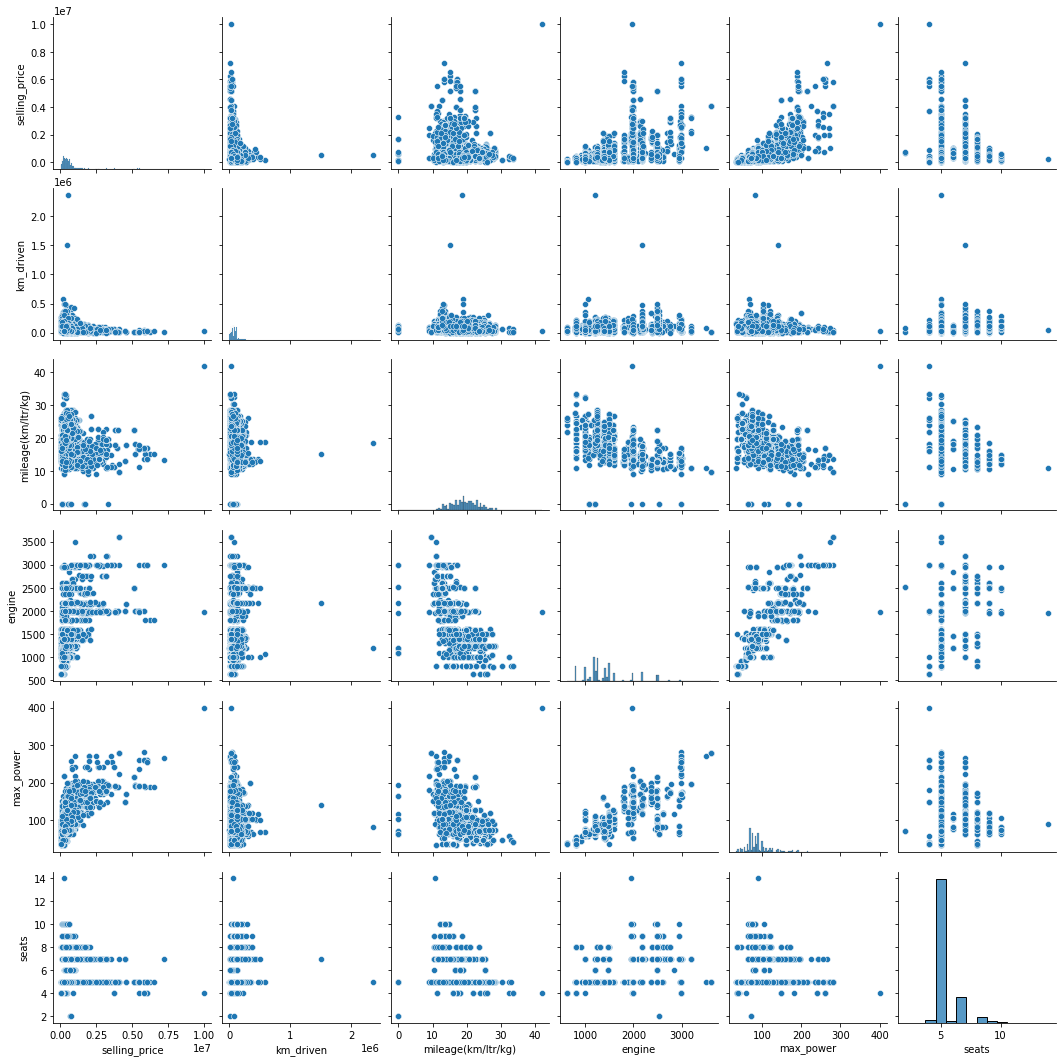

In [17]:
sns.pairplot(cardata[num_cols])
plt.show()

__Insights:__
    
    1. Engine and Max_power seems to have certain kind of correlationship.
    2. Selling_price have correlationship with max_power,engine

<AxesSubplot:>

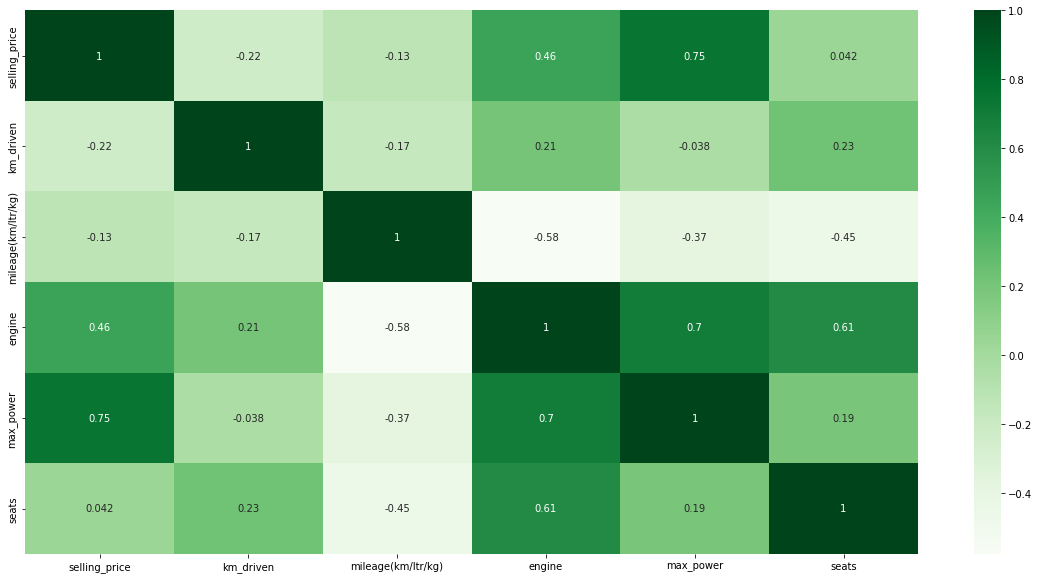

In [18]:
plt.figure(figsize = [20,10])
sns.heatmap(cardata.corr(),cmap='Greens', annot=True)

__We created a heatmap to verify if our inferences from the pairplot were true or not, as you can see engine & max_power are highly correlated to selling_price__

## Step-3: Data Preprocessing

In [19]:
cardata.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [20]:
cardata1 = pd.get_dummies(cardata)

In [21]:
cardata1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   selling_price                 7906 non-null   int64  
 1   km_driven                     7906 non-null   int64  
 2   mileage(km/ltr/kg)            7906 non-null   float64
 3   engine                        7906 non-null   float64
 4   max_power                     7906 non-null   float64
 5   seats                         7906 non-null   float64
 6   year_1994                     7906 non-null   uint8  
 7   year_1995                     7906 non-null   uint8  
 8   year_1996                     7906 non-null   uint8  
 9   year_1997                     7906 non-null   uint8  
 10  year_1998                     7906 non-null   uint8  
 11  year_1999                     7906 non-null   uint8  
 12  year_2000                     7906 non-null   uint8  
 13  yea

In [22]:
cardata1.head()

,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,year_1994,year_1995,year_1996,year_1997,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,23.40,1248.0,74.00,5.0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,370000,120000,21.14,1498.0,103.52,5.0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,158000,140000,17.70,1497.0,78.00,5.0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,225000,127000,23.00,1396.0,90.00,5.0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
4,130000,120000,16.10,1298.0,88.20,5.0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0


__Dropping unwanted year columns__

In [23]:
cardata1.drop(columns = cardata1.columns.to_series()["year_1994": "year_2014"], axis=1,inplace=True)

## Step-4: Splitting Dataset into Train & Test sets

In [24]:
df_train,df_test = train_test_split(cardata1, train_size=0.7, test_size=0.3, random_state=100)

In [25]:
df_train.shape

(5534, 26)

In [26]:
df_test.shape

(2372, 26)

__We need to rescale some features like selling_price, km_driven etc. so that all the variables in the dataset are in the same scale and thus model prediction will be easy.__

### Re-Scaling features : StandardScaler

In [27]:
scaler = MinMaxScaler()
scaling_cols = ['km_driven','mileage(km/ltr/kg)','engine','max_power','seats']
df_train[scaling_cols] = scaler.fit_transform(df_train[scaling_cols])
df_train.head()

,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,year_2015,year_2016,year_2017,year_2018,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
1858,5150000,0.008473,0.532619,0.625168,0.494989,0.250000,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
4541,350000,0.050837,0.404762,0.292953,0.232026,0.250000,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1035,757000,0.010591,0.676190,0.209396,0.112255,0.250000,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
2109,2600000,0.029655,0.485238,0.451007,0.300109,0.250000,0,0,1,0,...,0,1,0,1,0,1,0,0,0,0
5466,45000,0.038128,0.383333,0.057718,0.011438,0.166667,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0


__Creating X & y variables__

In [28]:
y_train = df_train.pop('selling_price')
X_train = df_train

In [29]:
X_train.head()

,km_driven,mileage(km/ltr/kg),engine,max_power,seats,year_2015,year_2016,year_2017,year_2018,year_2019,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
1858,0.008473,0.532619,0.625168,0.494989,0.250000,0,0,0,0,1,...,1,0,0,1,0,1,0,0,0,0
4541,0.050837,0.404762,0.292953,0.232026,0.250000,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1035,0.010591,0.676190,0.209396,0.112255,0.250000,0,0,0,0,1,...,0,1,0,0,1,1,0,0,0,0
2109,0.029655,0.485238,0.451007,0.300109,0.250000,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
5466,0.038128,0.383333,0.057718,0.011438,0.166667,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0


## Step-5: Model Building

__Feature selection using RFE(Recursive Feature Elimination) method__

In [30]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm,n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)

In [31]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('km_driven', True, 1),
 ('mileage(km/ltr/kg)', True, 1),
 ('engine', True, 1),
 ('max_power', True, 1),
 ('seats', True, 1),
 ('year_2015', True, 1),
 ('year_2016', True, 1),
 ('year_2017', True, 1),
 ('year_2018', True, 1),
 ('year_2019', True, 1),
 ('year_2020', True, 1),
 ('fuel_CNG', True, 1),
 ('fuel_Diesel', True, 1),
 ('fuel_LPG', True, 1),
 ('fuel_Petrol', True, 1),
 ('seller_type_Dealer', True, 1),
 ('seller_type_Individual', True, 1),
 ('seller_type_Trustmark Dealer', True, 1),
 ('transmission_Automatic', True, 1),
 ('transmission_Manual', True, 1),
 ('owner_First Owner', True, 1),
 ('owner_Fourth & Above Owner', True, 1),
 ('owner_Second Owner', True, 1),
 ('owner_Test Drive Car', True, 1),
 ('owner_Third Owner', True, 1)]

In [32]:
final_cols = X_train.columns[rfe.support_]
final_cols

Index(['km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats',
       'year_2015', 'year_2016', 'year_2017', 'year_2018', 'year_2019',
       'year_2020', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [33]:
X_train = X_train[final_cols]
X_train.head()

,km_driven,mileage(km/ltr/kg),engine,max_power,seats,year_2015,year_2016,year_2017,year_2018,year_2019,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
1858,0.008473,0.532619,0.625168,0.494989,0.250000,0,0,0,0,1,...,1,0,0,1,0,1,0,0,0,0
4541,0.050837,0.404762,0.292953,0.232026,0.250000,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1035,0.010591,0.676190,0.209396,0.112255,0.250000,0,0,0,0,1,...,0,1,0,0,1,1,0,0,0,0
2109,0.029655,0.485238,0.451007,0.300109,0.250000,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
5466,0.038128,0.383333,0.057718,0.011438,0.166667,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0


### Model Building

In [34]:
# Model - 1
X_train_sm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train,X_train_sm)
lr_model1 = lr_1.fit()

In [35]:
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     668.2
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:33:52   Log-Likelihood:                -79646.
No. Observations:                5534   AIC:                         1.593e+05
Df Residuals:                    5512   BIC:                         1.595e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         -4.13e+18   1.09e+18     -3.784      0.000   -6.27e+18   -1.99e+18
km_driven                    -1.228e+06   2.65e+05     -4.631      0.000   -1.75e+06   -7.08e+05
mileage(km/ltr/kg)            5.515e+05   9.69e+04      5.694      0.000    3.62e+05    7.41e+05
engine                        2.193e+05      8e+04      2.740      0.006    6.24e+04    3.76e+05
max_power                     4.607e+06   1.06e+05     43.444      0.000     4.4e+06    4.82e+06
seats                        -3.683e+05   1.05e+05     -3.510      0.000   -5.74e+05   -1.63e+05
year_2015                      8.36e+04   2.14e+04      3.908      0.000    4.17e+04    1.26e+05
year_2016                     1.677e+05   2.13e+04      7.874      0.000    1.26e+05     2.1e+05
year_2017                     2.527e+05   2.09e+04     12.098      0.000    2.12e+05    2.94e+05
year_2018                     2.843e+05   2.31e+04     12.320      0.000    2.39e+05     3.3e+05
year_2019                     7.665e+05   2.72e+04     28.187      0.000    7.13e+05     8.2e+05
year_2020                     2.286e+05   6.01e+04      3.804      0.000    1.11e+05    3.46e+05
fuel_CNG                     -2.208e+18   5.83e+17     -3.784      0.000   -3.35e+18   -1.06e+18
fuel_Diesel                  -2.208e+18   5.83e+17     -3.784      0.000   -3.35e+18   -1.06e+18
fuel_LPG                     -2.208e+18   5.83e+17     -3.784      0.000   -3.35e+18   -1.06e+18
fuel_Petrol                  -2.208e+18   5.83e+17     -3.784      0.000   -3.35e+18   -1.06e+18
seller_type_Dealer            1.977e+18   5.22e+17      3.784      0.000    9.53e+17       3e+18
seller_type_Individual        1.977e+18   5.22e+17      3.784      0.000    9.53e+17       3e+18
seller_type_Trustmark Dealer  1.977e+18   5.22e+17      3.784      0.000    9.53e+17       3e+18
transmission_Automatic        4.779e+18   1.26e+18      3.784      0.000     2.3e+18    7.25e+18
transmission_Manual           4.779e+18   1.26e+18      3.784      0.000     2.3e+18    7.25e+18
owner_First Owner            -4.174e+17    1.1e+17     -3.784      0.000   -6.34e+17   -2.01e+17
owner_Fourth & Above Owner   -4.174e+17    1.1e+17     -3.784      0.000   -6.34e+17   -2.01e+17
owner_Second Owner           -4.174e+17    1.1e+17     -3.784      0.000   -6.34e+17   -2.01e+17
owner_Test Drive Car         -4.174e+17    1.1e+17     -3.784      0.000   -6.34e+17   -2.01e+17
owner_Third Owner            -4.174e+17    1.1e+17     -3.784      0.000   -6.34e+17   -2.01e+17
==============================================================================
Omnibus:                     2358.891   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33532.398
Skew:                           1

In [36]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
12,fuel_Diesel,inf
13,fuel_LPG,inf
23,owner_Test Drive Car,inf
22,owner_Second Owner,inf
21,owner_Fourth & Above Owner,inf
20,owner_First Owner,inf
19,transmission_Manual,inf
18,transmission_Automatic,inf
17,seller_type_Trustmark Dealer,inf
16,seller_type_Individual,inf


Looks like there are many highly correlated variables, we need to drop them

In [37]:
#collinear_columns = vif['Features'].iloc[0:14]
#collinear_columns

In [38]:
X_train.drop(columns = 'fuel_LPG' , axis=1, inplace=True)
X_train.head()

,km_driven,mileage(km/ltr/kg),engine,max_power,seats,year_2015,year_2016,year_2017,year_2018,year_2019,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
1858,0.008473,0.532619,0.625168,0.494989,0.250000,0,0,0,0,1,...,1,0,0,1,0,1,0,0,0,0
4541,0.050837,0.404762,0.292953,0.232026,0.250000,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1035,0.010591,0.676190,0.209396,0.112255,0.250000,0,0,0,0,1,...,0,1,0,0,1,1,0,0,0,0
2109,0.029655,0.485238,0.451007,0.300109,0.250000,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
5466,0.038128,0.383333,0.057718,0.011438,0.166667,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0


### Re-Building Model

In [39]:
# Model - 2
X_train_sm1 = sm.add_constant(X_train)
lr_2 = sm.OLS(y_train,X_train_sm1)
lr_model2 = lr_2.fit()

In [40]:
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     673.6
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:33:53   Log-Likelihood:                -79630.
No. Observations:                5534   AIC:                         1.593e+05
Df Residuals:                    5512   BIC:                         1.594e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         1.998e+05    5.5e+04      3.629      0.000    9.19e+04    3.08e+05
km_driven                    -1.227e+06   2.64e+05     -4.640      0.000   -1.75e+06   -7.08e+05
mileage(km/ltr/kg)            5.715e+05   9.64e+04      5.926      0.000    3.82e+05    7.61e+05
engine                        2.323e+05   7.97e+04      2.914      0.004     7.6e+04    3.89e+05
max_power                     4.608e+06   1.06e+05     43.577      0.000     4.4e+06    4.82e+06
seats                        -3.671e+05   1.05e+05     -3.509      0.000   -5.72e+05   -1.62e+05
year_2015                     8.357e+04   2.13e+04      3.918      0.000    4.18e+04    1.25e+05
year_2016                     1.679e+05   2.12e+04      7.905      0.000    1.26e+05     2.1e+05
year_2017                     2.519e+05   2.08e+04     12.095      0.000    2.11e+05    2.93e+05
year_2018                     2.832e+05    2.3e+04     12.309      0.000    2.38e+05    3.28e+05
year_2019                     7.691e+05   2.71e+04     28.374      0.000    7.16e+05    8.22e+05
year_2020                     2.286e+05   5.99e+04      3.815      0.000    1.11e+05    3.46e+05
fuel_CNG                      -2.29e+05   1.13e+05     -2.033      0.042    -4.5e+05   -8203.494
fuel_Diesel                    -1.9e+05   8.45e+04     -2.250      0.025   -3.56e+05   -2.44e+04
fuel_Petrol                  -2.824e+05   8.36e+04     -3.379      0.001   -4.46e+05   -1.19e+05
seller_type_Dealer            2.728e+05   2.34e+04     11.646      0.000    2.27e+05    3.19e+05
seller_type_Individual        1.918e+04   2.18e+04      0.879      0.379   -2.36e+04     6.2e+04
seller_type_Trustmark Dealer -9.223e+04   3.16e+04     -2.922      0.003   -1.54e+05   -3.04e+04
transmission_Automatic        2.884e+05   3.02e+04      9.566      0.000    2.29e+05    3.48e+05
transmission_Manual          -8.867e+04   2.92e+04     -3.037      0.002   -1.46e+05   -3.14e+04
owner_First Owner            -3.923e+05    4.2e+04     -9.345      0.000   -4.75e+05    -3.1e+05
owner_Fourth & Above Owner   -4.672e+05   5.29e+04     -8.830      0.000   -5.71e+05   -3.63e+05
owner_Second Owner           -4.166e+05   4.24e+04     -9.815      0.000      -5e+05   -3.33e+05
owner_Test Drive Car          1.924e+06   1.79e+05     10.774      0.000    1.57e+06    2.27e+06
owner_Third Owner             -4.48e+05   4.53e+04     -9.900      0.000   -5.37e+05   -3.59e+05
==============================================================================
Omnibus:                     2286.662   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32200.863
Skew:                           1.588   Prob(JB):                         0.00
Kurtosis:                      14.383   Cond. No.  

In [41]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
23,owner_Third Owner,inf
14,seller_type_Dealer,inf
22,owner_Test Drive Car,inf
21,owner_Second Owner,inf
20,owner_Fourth & Above Owner,inf
19,owner_First Owner,inf
18,transmission_Manual,inf
17,transmission_Automatic,inf
16,seller_type_Trustmark Dealer,inf
15,seller_type_Individual,inf


In [42]:
X_train.drop(columns = 'seller_type_Individual' , axis=1, inplace=True)
X_train.head()

,km_driven,mileage(km/ltr/kg),engine,max_power,seats,year_2015,year_2016,year_2017,year_2018,year_2019,...,fuel_Petrol,seller_type_Dealer,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
1858,0.008473,0.532619,0.625168,0.494989,0.250000,0,0,0,0,1,...,1,1,0,1,0,1,0,0,0,0
4541,0.050837,0.404762,0.292953,0.232026,0.250000,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1035,0.010591,0.676190,0.209396,0.112255,0.250000,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
2109,0.029655,0.485238,0.451007,0.300109,0.250000,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
5466,0.038128,0.383333,0.057718,0.011438,0.166667,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0


In [43]:
# Model - 3
X_train_sm2 = sm.add_constant(X_train)
lr_3 = sm.OLS(y_train,X_train_sm2)
lr_model3 = lr_3.fit()

In [44]:
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     671.5
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:33:54   Log-Likelihood:                -79636.
No. Observations:                5534   AIC:                         1.593e+05
Df Residuals:                    5512   BIC:                         1.595e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -5.422e+18   1.37e+18     -3.972      0.000    -8.1e+18   -2.75e+18
km_driven                    -1.207e+06   2.65e+05     -4.559      0.000   -1.73e+06   -6.88e+05
mileage(km/ltr/kg)            5.512e+05   9.67e+04      5.701      0.000    3.62e+05    7.41e+05
engine                        2.179e+05   7.99e+04      2.727      0.006    6.13e+04    3.75e+05
max_power                     4.597e+06   1.06e+05     43.412      0.000    4.39e+06     4.8e+06
seats                        -3.593e+05   1.05e+05     -3.430      0.001   -5.65e+05   -1.54e+05
year_2015                     8.332e+04   2.14e+04      3.902      0.000    4.15e+04    1.25e+05
year_2016                     1.688e+05   2.13e+04      7.938      0.000    1.27e+05    2.11e+05
year_2017                     2.527e+05   2.09e+04     12.119      0.000    2.12e+05    2.94e+05
year_2018                     2.844e+05    2.3e+04     12.348      0.000    2.39e+05     3.3e+05
year_2019                     7.661e+05   2.71e+04     28.221      0.000    7.13e+05    8.19e+05
year_2020                     2.285e+05      6e+04      3.810      0.000    1.11e+05    3.46e+05
fuel_CNG                     -2.323e+05   1.13e+05     -2.060      0.039   -4.53e+05   -1.12e+04
fuel_Diesel                  -1.913e+05   8.46e+04     -2.263      0.024   -3.57e+05   -2.56e+04
fuel_Petrol                  -2.875e+05   8.37e+04     -3.436      0.001   -4.52e+05   -1.23e+05
seller_type_Dealer            2.521e+05   1.88e+04     13.388      0.000    2.15e+05    2.89e+05
seller_type_Trustmark Dealer -1.088e+05   3.53e+04     -3.087      0.002   -1.78e+05   -3.97e+04
transmission_Automatic        7.055e+18   1.78e+18      3.972      0.000    3.57e+18    1.05e+19
transmission_Manual           7.055e+18   1.78e+18      3.972      0.000    3.57e+18    1.05e+19
owner_First Owner            -1.632e+18   4.11e+17     -3.972      0.000   -2.44e+18   -8.26e+17
owner_Fourth & Above Owner   -1.632e+18   4.11e+17     -3.972      0.000   -2.44e+18   -8.26e+17
owner_Second Owner           -1.632e+18   4.11e+17     -3.972      0.000   -2.44e+18   -8.26e+17
owner_Test Drive Car         -1.632e+18   4.11e+17     -3.972      0.000   -2.44e+18   -8.26e+17
owner_Third Owner            -1.632e+18   4.11e+17     -3.972      0.000   -2.44e+18   -8.26e+17
==============================================================================
Omnibus:                     2398.653   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34705.080
Skew:                           1.682   Prob(JB):                         0.00
Kurtosis:                      14.798   Cond. No.                     1.96e+16
=====================================================================

In [45]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
22,owner_Third Owner,inf
21,owner_Test Drive Car,inf
20,owner_Second Owner,inf
19,owner_Fourth & Above Owner,inf
18,owner_First Owner,inf
17,transmission_Manual,inf
16,transmission_Automatic,inf
12,fuel_Diesel,52.94
13,fuel_Petrol,51.61
2,engine,5.48


In [46]:
X_train.drop(columns = 'owner_Third Owner' , axis=1, inplace=True)
X_train.head()

,km_driven,mileage(km/ltr/kg),engine,max_power,seats,year_2015,year_2016,year_2017,year_2018,year_2019,...,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car
1858,0.008473,0.532619,0.625168,0.494989,0.250000,0,0,0,0,1,...,0,1,1,0,1,0,1,0,0,0
4541,0.050837,0.404762,0.292953,0.232026,0.250000,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1035,0.010591,0.676190,0.209396,0.112255,0.250000,0,0,0,0,1,...,1,0,0,0,0,1,1,0,0,0
2109,0.029655,0.485238,0.451007,0.300109,0.250000,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
5466,0.038128,0.383333,0.057718,0.011438,0.166667,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [47]:
# Model - 4
X_train_sm3 = sm.add_constant(X_train)
lr_4 = sm.OLS(y_train,X_train_sm3)
lr_model4 = lr_4.fit()

In [48]:
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     660.5
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:33:54   Log-Likelihood:                -79669.
No. Observations:                5534   AIC:                         1.594e+05
Df Residuals:                    5512   BIC:                         1.595e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -7.248e+18   1.84e+18     -3.934      0.000   -1.09e+19   -3.64e+18
km_driven                    -1.229e+06   2.66e+05     -4.615      0.000   -1.75e+06   -7.07e+05
mileage(km/ltr/kg)            5.543e+05   9.72e+04      5.701      0.000    3.64e+05    7.45e+05
engine                        2.172e+05   8.04e+04      2.701      0.007    5.96e+04    3.75e+05
max_power                     4.601e+06   1.07e+05     43.203      0.000    4.39e+06    4.81e+06
seats                        -3.641e+05   1.05e+05     -3.456      0.001   -5.71e+05   -1.58e+05
year_2015                     8.422e+04   2.15e+04      3.921      0.000    4.21e+04    1.26e+05
year_2016                     1.679e+05   2.14e+04      7.849      0.000    1.26e+05     2.1e+05
year_2017                     2.522e+05    2.1e+04     12.022      0.000    2.11e+05    2.93e+05
year_2018                     2.859e+05   2.32e+04     12.332      0.000     2.4e+05    3.31e+05
year_2019                     7.647e+05   2.73e+04     27.992      0.000    7.11e+05    8.18e+05
year_2020                     2.303e+05   6.04e+04      3.816      0.000    1.12e+05    3.49e+05
fuel_CNG                     -2.269e+05   1.13e+05     -2.000      0.046   -4.49e+05   -4519.242
fuel_Diesel                  -1.858e+05   8.51e+04     -2.185      0.029   -3.53e+05   -1.91e+04
fuel_Petrol                  -2.824e+05   8.42e+04     -3.355      0.001   -4.47e+05   -1.17e+05
seller_type_Dealer            2.502e+05    1.9e+04     13.191      0.000    2.13e+05    2.87e+05
seller_type_Trustmark Dealer -1.096e+05   3.55e+04     -3.090      0.002   -1.79e+05   -4.01e+04
transmission_Automatic        7.248e+18   1.84e+18      3.934      0.000    3.64e+18    1.09e+19
transmission_Manual           7.248e+18   1.84e+18      3.934      0.000    3.64e+18    1.09e+19
owner_First Owner              5.57e+04   2.54e+04      2.197      0.028    5999.343    1.05e+05
owner_Fourth & Above Owner   -1.778e+04   4.72e+04     -0.377      0.706    -1.1e+05    7.47e+04
owner_Second Owner            2.989e+04   2.55e+04      1.170      0.242   -2.02e+04       8e+04
owner_Test Drive Car           2.38e+06    2.2e+05     10.814      0.000    1.95e+06    2.81e+06
==============================================================================
Omnibus:                     2064.108   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28262.671
Skew:                           1.397   Prob(JB):                         0.00
Kurtosis:                      13.713   Cond. No.                     9.91e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctl

In [49]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
17,transmission_Manual,278.82
12,fuel_Diesel,52.94
13,fuel_Petrol,51.61
16,transmission_Automatic,44.09
2,engine,5.48
18,owner_First Owner,4.27
20,owner_Second Owner,3.67
3,max_power,3.18
1,mileage(km/ltr/kg),2.61
11,fuel_CNG,2.25


In [50]:
X_train.drop(columns = 'transmission_Manual' , axis=1, inplace=True)
X_train.head()

,km_driven,mileage(km/ltr/kg),engine,max_power,seats,year_2015,year_2016,year_2017,year_2018,year_2019,...,fuel_CNG,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Trustmark Dealer,transmission_Automatic,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car
1858,0.008473,0.532619,0.625168,0.494989,0.250000,0,0,0,0,1,...,0,0,1,1,0,1,1,0,0,0
4541,0.050837,0.404762,0.292953,0.232026,0.250000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1035,0.010591,0.676190,0.209396,0.112255,0.250000,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
2109,0.029655,0.485238,0.451007,0.300109,0.250000,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
5466,0.038128,0.383333,0.057718,0.011438,0.166667,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [51]:
# Model - 5
X_train_sm4 = sm.add_constant(X_train)
lr_5 = sm.OLS(y_train,X_train_sm4)
lr_model5 = lr_5.fit()

In [52]:
lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     673.6
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:33:55   Log-Likelihood:                -79630.
No. Observations:                5534   AIC:                         1.593e+05
Df Residuals:                    5512   BIC:                         1.594e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -3.177e+05   1.04e+05     -3.064      0.002   -5.21e+05   -1.14e+05
km_driven                    -1.227e+06   2.64e+05     -4.640      0.000   -1.75e+06   -7.08e+05
mileage(km/ltr/kg)            5.715e+05   9.64e+04      5.926      0.000    3.82e+05    7.61e+05
engine                        2.323e+05   7.97e+04      2.914      0.004     7.6e+04    3.89e+05
max_power                     4.608e+06   1.06e+05     43.577      0.000     4.4e+06    4.82e+06
seats                        -3.671e+05   1.05e+05     -3.509      0.000   -5.72e+05   -1.62e+05
year_2015                     8.357e+04   2.13e+04      3.918      0.000    4.18e+04    1.25e+05
year_2016                     1.679e+05   2.12e+04      7.905      0.000    1.26e+05     2.1e+05
year_2017                     2.519e+05   2.08e+04     12.095      0.000    2.11e+05    2.93e+05
year_2018                     2.832e+05    2.3e+04     12.309      0.000    2.38e+05    3.28e+05
year_2019                     7.691e+05   2.71e+04     28.374      0.000    7.16e+05    8.22e+05
year_2020                     2.286e+05   5.99e+04      3.815      0.000    1.11e+05    3.46e+05
fuel_CNG                      -2.29e+05   1.13e+05     -2.033      0.042    -4.5e+05   -8203.494
fuel_Diesel                    -1.9e+05   8.45e+04     -2.250      0.025   -3.56e+05   -2.44e+04
fuel_Petrol                  -2.824e+05   8.36e+04     -3.379      0.001   -4.46e+05   -1.19e+05
seller_type_Dealer            2.536e+05   1.88e+04     13.484      0.000    2.17e+05    2.91e+05
seller_type_Trustmark Dealer -1.114e+05   3.52e+04     -3.164      0.002    -1.8e+05   -4.24e+04
transmission_Automatic        3.771e+05   2.22e+04     16.976      0.000    3.34e+05    4.21e+05
owner_First Owner              5.57e+04   2.52e+04      2.213      0.027    6348.189    1.05e+05
owner_Fourth & Above Owner   -1.919e+04   4.68e+04     -0.410      0.682   -1.11e+05    7.26e+04
owner_Second Owner            3.146e+04   2.54e+04      1.241      0.215   -1.82e+04    8.12e+04
owner_Test Drive Car          2.372e+06   2.18e+05     10.855      0.000    1.94e+06     2.8e+06
==============================================================================
Omnibus:                     2286.662   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32200.863
Skew:                           1.588   Prob(JB):                         0.00
Kurtosis:                      14.383   Cond. No.                         72.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
12,fuel_Diesel,56.50
1,mileage(km/ltr/kg),45.33
13,fuel_Petrol,35.12
4,seats,25.80
2,engine,20.15
17,owner_First Owner,12.11
3,max_power,11.55
19,owner_Second Owner,4.78
0,km_driven,3.16
16,transmission_Automatic,1.95


In [54]:
X_train.drop(columns = 'owner_Fourth & Above Owner' , axis=1, inplace=True)
X_train.head()

,km_driven,mileage(km/ltr/kg),engine,max_power,seats,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,fuel_CNG,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Trustmark Dealer,transmission_Automatic,owner_First Owner,owner_Second Owner,owner_Test Drive Car
1858,0.008473,0.532619,0.625168,0.494989,0.250000,0,0,0,0,1,0,0,0,1,1,0,1,1,0,0
4541,0.050837,0.404762,0.292953,0.232026,0.250000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1035,0.010591,0.676190,0.209396,0.112255,0.250000,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2109,0.029655,0.485238,0.451007,0.300109,0.250000,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0
5466,0.038128,0.383333,0.057718,0.011438,0.166667,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [55]:
# Model - 6
X_train_sm5 = sm.add_constant(X_train)
lr_6 = sm.OLS(y_train,X_train_sm5)
lr_model6 = lr_6.fit()

In [56]:
lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     707.3
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:33:55   Log-Likelihood:                -79630.
No. Observations:                5534   AIC:                         1.593e+05
Df Residuals:                    5513   BIC:                         1.594e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -3.225e+05   1.03e+05     -3.130      0.002   -5.25e+05   -1.21e+05
km_driven                    -1.228e+06   2.64e+05     -4.643      0.000   -1.75e+06   -7.09e+05
mileage(km/ltr/kg)            5.724e+05   9.64e+04      5.938      0.000    3.83e+05    7.61e+05
engine                        2.327e+05   7.97e+04      2.919      0.004    7.64e+04    3.89e+05
max_power                     4.608e+06   1.06e+05     43.584      0.000     4.4e+06    4.82e+06
seats                         -3.67e+05   1.05e+05     -3.508      0.000   -5.72e+05   -1.62e+05
year_2015                     8.372e+04   2.13e+04      3.926      0.000    4.19e+04    1.26e+05
year_2016                      1.68e+05   2.12e+04      7.908      0.000    1.26e+05     2.1e+05
year_2017                     2.519e+05   2.08e+04     12.096      0.000    2.11e+05    2.93e+05
year_2018                     2.832e+05    2.3e+04     12.308      0.000    2.38e+05    3.28e+05
year_2019                     7.691e+05   2.71e+04     28.375      0.000    7.16e+05    8.22e+05
year_2020                     2.286e+05   5.99e+04      3.815      0.000    1.11e+05    3.46e+05
fuel_CNG                     -2.297e+05   1.13e+05     -2.040      0.041   -4.51e+05   -8943.609
fuel_Diesel                  -1.903e+05   8.45e+04     -2.253      0.024   -3.56e+05   -2.47e+04
fuel_Petrol                  -2.825e+05   8.36e+04     -3.381      0.001   -4.46e+05   -1.19e+05
seller_type_Dealer            2.537e+05   1.88e+04     13.487      0.000    2.17e+05    2.91e+05
seller_type_Trustmark Dealer -1.114e+05   3.52e+04     -3.164      0.002    -1.8e+05   -4.24e+04
transmission_Automatic         3.77e+05   2.22e+04     16.974      0.000    3.33e+05    4.21e+05
owner_First Owner             6.008e+04   2.28e+04      2.636      0.008    1.54e+04    1.05e+05
owner_Second Owner            3.588e+04   2.29e+04      1.564      0.118   -9096.014    8.09e+04
owner_Test Drive Car          2.376e+06   2.18e+05     10.889      0.000    1.95e+06     2.8e+06
==============================================================================
Omnibus:                     2286.142   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32192.061
Skew:                           1.587   Prob(JB):                         0.00
Kurtosis:                      14.381   Cond. No.                         72.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
12,fuel_Diesel,55.59
1,mileage(km/ltr/kg),45.26
13,fuel_Petrol,34.31
4,seats,25.77
2,engine,20.15
3,max_power,11.55
17,owner_First Owner,10.03
18,owner_Second Owner,3.96
0,km_driven,3.16
16,transmission_Automatic,1.95


In [58]:
X_train.drop(columns = 'owner_Second Owner' , axis=1, inplace=True)
X_train.head()

,km_driven,mileage(km/ltr/kg),engine,max_power,seats,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,fuel_CNG,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Trustmark Dealer,transmission_Automatic,owner_First Owner,owner_Test Drive Car
1858,0.008473,0.532619,0.625168,0.494989,0.250000,0,0,0,0,1,0,0,0,1,1,0,1,1,0
4541,0.050837,0.404762,0.292953,0.232026,0.250000,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1035,0.010591,0.676190,0.209396,0.112255,0.250000,0,0,0,0,1,0,0,1,0,0,0,0,1,0
2109,0.029655,0.485238,0.451007,0.300109,0.250000,0,0,1,0,0,0,0,1,0,0,0,1,1,0
5466,0.038128,0.383333,0.057718,0.011438,0.166667,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [59]:
# Model - 7
X_train_sm6 = sm.add_constant(X_train)
lr_7 = sm.OLS(y_train,X_train_sm6)
lr_model7 = lr_7.fit()

In [60]:
lr_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     744.3
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:33:55   Log-Likelihood:                -79631.
No. Observations:                5534   AIC:                         1.593e+05
Df Residuals:                    5514   BIC:                         1.594e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -2.981e+05   1.02e+05     -2.927      0.003   -4.98e+05   -9.84e+04
km_driven                    -1.241e+06   2.64e+05     -4.695      0.000   -1.76e+06   -7.23e+05
mileage(km/ltr/kg)            5.775e+05   9.64e+04      5.993      0.000    3.89e+05    7.66e+05
engine                        2.365e+05   7.97e+04      2.968      0.003    8.03e+04    3.93e+05
max_power                     4.605e+06   1.06e+05     43.556      0.000     4.4e+06    4.81e+06
seats                        -3.677e+05   1.05e+05     -3.514      0.000   -5.73e+05   -1.63e+05
year_2015                     8.555e+04   2.13e+04      4.017      0.000    4.38e+04    1.27e+05
year_2016                     1.697e+05   2.12e+04      7.998      0.000    1.28e+05    2.11e+05
year_2017                     2.533e+05   2.08e+04     12.169      0.000    2.12e+05    2.94e+05
year_2018                     2.842e+05    2.3e+04     12.358      0.000    2.39e+05    3.29e+05
year_2019                     7.697e+05   2.71e+04     28.397      0.000    7.17e+05    8.23e+05
year_2020                     2.298e+05   5.99e+04      3.835      0.000    1.12e+05    3.47e+05
fuel_CNG                     -2.278e+05   1.13e+05     -2.022      0.043   -4.49e+05   -6963.730
fuel_Diesel                  -1.903e+05   8.45e+04     -2.253      0.024   -3.56e+05   -2.47e+04
fuel_Petrol                  -2.824e+05   8.36e+04     -3.379      0.001   -4.46e+05   -1.19e+05
seller_type_Dealer            2.543e+05   1.88e+04     13.524      0.000    2.17e+05    2.91e+05
seller_type_Trustmark Dealer -1.103e+05   3.52e+04     -3.131      0.002   -1.79e+05   -4.12e+04
transmission_Automatic        3.772e+05   2.22e+04     16.980      0.000    3.34e+05    4.21e+05
owner_First Owner             3.214e+04   1.41e+04      2.271      0.023    4398.644    5.99e+04
owner_Test Drive Car          2.348e+06   2.18e+05     10.796      0.000    1.92e+06    2.77e+06
==============================================================================
Omnibus:                     2283.225   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32125.327
Skew:                           1.585   Prob(JB):                         0.00
Kurtosis:                      14.370   Cond. No.                         72.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
12,fuel_Diesel,54.19
1,mileage(km/ltr/kg),44.47
13,fuel_Petrol,32.90
4,seats,25.71
2,engine,20.10
3,max_power,11.55
17,owner_First Owner,3.92
0,km_driven,3.16
16,transmission_Automatic,1.95
7,year_2017,1.62


In [62]:
X_train.drop(columns = 'fuel_CNG' , axis=1, inplace=True)
X_train.head()

,km_driven,mileage(km/ltr/kg),engine,max_power,seats,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Trustmark Dealer,transmission_Automatic,owner_First Owner,owner_Test Drive Car
1858,0.008473,0.532619,0.625168,0.494989,0.250000,0,0,0,0,1,0,0,1,1,0,1,1,0
4541,0.050837,0.404762,0.292953,0.232026,0.250000,0,0,0,0,0,0,0,1,0,0,0,0,0
1035,0.010591,0.676190,0.209396,0.112255,0.250000,0,0,0,0,1,0,1,0,0,0,0,1,0
2109,0.029655,0.485238,0.451007,0.300109,0.250000,0,0,1,0,0,0,1,0,0,0,1,1,0
5466,0.038128,0.383333,0.057718,0.011438,0.166667,0,0,0,0,0,0,0,1,0,0,0,0,0


In [63]:
# Model - 8
X_train_sm7 = sm.add_constant(X_train)
lr_8 = sm.OLS(y_train,X_train_sm7)
lr_model8 = lr_8.fit()

In [64]:
lr_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     784.9
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:33:56   Log-Likelihood:                -79633.
No. Observations:                5534   AIC:                         1.593e+05
Df Residuals:                    5515   BIC:                         1.594e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -4.114e+05   8.51e+04     -4.833      0.000   -5.78e+05   -2.45e+05
km_driven                    -1.236e+06   2.64e+05     -4.675      0.000   -1.75e+06   -7.18e+05
mileage(km/ltr/kg)            5.584e+05   9.59e+04      5.821      0.000     3.7e+05    7.46e+05
engine                         2.26e+05   7.95e+04      2.841      0.005       7e+04    3.82e+05
max_power                     4.607e+06   1.06e+05     43.564      0.000     4.4e+06    4.81e+06
seats                        -3.694e+05   1.05e+05     -3.530      0.000   -5.75e+05   -1.64e+05
year_2015                     8.528e+04   2.13e+04      4.003      0.000    4.35e+04    1.27e+05
year_2016                     1.689e+05   2.12e+04      7.961      0.000    1.27e+05    2.11e+05
year_2017                     2.524e+05   2.08e+04     12.128      0.000    2.12e+05    2.93e+05
year_2018                     2.835e+05    2.3e+04     12.325      0.000    2.38e+05    3.29e+05
year_2019                     7.683e+05   2.71e+04     28.348      0.000    7.15e+05    8.21e+05
year_2020                     2.239e+05   5.99e+04      3.740      0.000    1.07e+05    3.41e+05
fuel_Diesel                  -6.436e+04   5.71e+04     -1.128      0.259   -1.76e+05    4.75e+04
fuel_Petrol                  -1.584e+05   5.68e+04     -2.789      0.005    -2.7e+05    -4.7e+04
seller_type_Dealer            2.549e+05   1.88e+04     13.551      0.000    2.18e+05    2.92e+05
seller_type_Trustmark Dealer -1.093e+05   3.52e+04     -3.104      0.002   -1.78e+05   -4.03e+04
transmission_Automatic        3.777e+05   2.22e+04     16.999      0.000    3.34e+05    4.21e+05
owner_First Owner              3.25e+04   1.42e+04      2.296      0.022    4755.247    6.02e+04
owner_Test Drive Car          2.349e+06   2.18e+05     10.795      0.000    1.92e+06    2.78e+06
==============================================================================
Omnibus:                     2283.528   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32168.341
Skew:                           1.585   Prob(JB):                         0.00
Kurtosis:                      14.378   Cond. No.                         72.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
11,fuel_Diesel,35.41
1,mileage(km/ltr/kg),31.17
4,seats,24.27
12,fuel_Petrol,21.53
2,engine,19.56
3,max_power,11.49
16,owner_First Owner,3.92
0,km_driven,3.15
15,transmission_Automatic,1.95
7,year_2017,1.62


In [66]:
X_train.drop(columns = 'fuel_Diesel' , axis=1, inplace=True)
X_train.head()

,km_driven,mileage(km/ltr/kg),engine,max_power,seats,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,fuel_Petrol,seller_type_Dealer,seller_type_Trustmark Dealer,transmission_Automatic,owner_First Owner,owner_Test Drive Car
1858,0.008473,0.532619,0.625168,0.494989,0.250000,0,0,0,0,1,0,1,1,0,1,1,0
4541,0.050837,0.404762,0.292953,0.232026,0.250000,0,0,0,0,0,0,1,0,0,0,0,0
1035,0.010591,0.676190,0.209396,0.112255,0.250000,0,0,0,0,1,0,0,0,0,0,1,0
2109,0.029655,0.485238,0.451007,0.300109,0.250000,0,0,1,0,0,0,0,0,0,1,1,0
5466,0.038128,0.383333,0.057718,0.011438,0.166667,0,0,0,0,0,0,1,0,0,0,0,0


In [67]:
# Model - 9
X_train_sm8 = sm.add_constant(X_train)
lr_9 = sm.OLS(y_train,X_train_sm8)
lr_model9 = lr_9.fit()

In [68]:
lr_model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     831.0
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:33:56   Log-Likelihood:                -79634.
No. Observations:                5534   AIC:                         1.593e+05
Df Residuals:                    5516   BIC:                         1.594e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -4.663e+05   6.98e+04     -6.683      0.000   -6.03e+05    -3.3e+05
km_driven                    -1.239e+06   2.64e+05     -4.687      0.000   -1.76e+06   -7.21e+05
mileage(km/ltr/kg)            5.513e+05   9.57e+04      5.759      0.000    3.64e+05    7.39e+05
engine                        2.188e+05   7.93e+04      2.760      0.006    6.34e+04    3.74e+05
max_power                     4.602e+06   1.06e+05     43.556      0.000    4.39e+06    4.81e+06
seats                         -3.73e+05   1.05e+05     -3.566      0.000   -5.78e+05   -1.68e+05
year_2015                     8.515e+04   2.13e+04      3.997      0.000    4.34e+04    1.27e+05
year_2016                     1.691e+05   2.12e+04      7.969      0.000    1.27e+05    2.11e+05
year_2017                     2.525e+05   2.08e+04     12.133      0.000    2.12e+05    2.93e+05
year_2018                     2.837e+05    2.3e+04     12.335      0.000    2.39e+05    3.29e+05
year_2019                     7.691e+05   2.71e+04     28.384      0.000    7.16e+05    8.22e+05
year_2020                     2.274e+05   5.98e+04      3.803      0.000     1.1e+05    3.45e+05
fuel_Petrol                  -9.723e+04   1.69e+04     -5.751      0.000    -1.3e+05   -6.41e+04
seller_type_Dealer            2.544e+05   1.88e+04     13.530      0.000    2.18e+05    2.91e+05
seller_type_Trustmark Dealer -1.089e+05   3.52e+04     -3.092      0.002   -1.78e+05   -3.98e+04
transmission_Automatic        3.784e+05   2.22e+04     17.033      0.000    3.35e+05    4.22e+05
owner_First Owner             3.224e+04   1.42e+04      2.279      0.023    4501.539       6e+04
owner_Test Drive Car           2.35e+06   2.18e+05     10.801      0.000    1.92e+06    2.78e+06
==============================================================================
Omnibus:                     2287.238   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32263.855
Skew:                           1.588   Prob(JB):                         0.00
Kurtosis:                      14.395   Cond. No.                         68.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
4,seats,21.45
2,engine,18.44
1,mileage(km/ltr/kg),11.41
3,max_power,11.22
15,owner_First Owner,3.92
0,km_driven,3.12
11,fuel_Petrol,2.16
14,transmission_Automatic,1.95
7,year_2017,1.60
9,year_2019,1.58


In [70]:
X_train.drop(columns = 'seats' , axis=1, inplace=True)
X_train.head()

,km_driven,mileage(km/ltr/kg),engine,max_power,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,fuel_Petrol,seller_type_Dealer,seller_type_Trustmark Dealer,transmission_Automatic,owner_First Owner,owner_Test Drive Car
1858,0.008473,0.532619,0.625168,0.494989,0,0,0,0,1,0,1,1,0,1,1,0
4541,0.050837,0.404762,0.292953,0.232026,0,0,0,0,0,0,1,0,0,0,0,0
1035,0.010591,0.676190,0.209396,0.112255,0,0,0,0,1,0,0,0,0,0,1,0
2109,0.029655,0.485238,0.451007,0.300109,0,0,1,0,0,0,0,0,0,1,1,0
5466,0.038128,0.383333,0.057718,0.011438,0,0,0,0,0,0,1,0,0,0,0,0


In [71]:
# Model - 10
X_train_sm9 = sm.add_constant(X_train)
lr_10 = sm.OLS(y_train,X_train_sm9)
lr_model10 = lr_10.fit()

In [72]:
lr_model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     880.3
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:33:56   Log-Likelihood:                -79640.
No. Observations:                5534   AIC:                         1.593e+05
Df Residuals:                    5517   BIC:                         1.594e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -5.916e+05   6.04e+04     -9.800      0.000    -7.1e+05   -4.73e+05
km_driven                     -1.27e+06   2.64e+05     -4.802      0.000   -1.79e+06   -7.52e+05
mileage(km/ltr/kg)            6.309e+05   9.32e+04      6.770      0.000    4.48e+05    8.14e+05
engine                        9.147e+04   7.09e+04      1.291      0.197   -4.75e+04     2.3e+05
max_power                     4.725e+06   9.99e+04     47.279      0.000    4.53e+06    4.92e+06
year_2015                     7.635e+04   2.12e+04      3.605      0.000    3.48e+04    1.18e+05
year_2016                     1.588e+05    2.1e+04      7.546      0.000    1.18e+05       2e+05
year_2017                     2.446e+05   2.07e+04     11.807      0.000    2.04e+05    2.85e+05
year_2018                     2.748e+05   2.29e+04     12.006      0.000     2.3e+05     3.2e+05
year_2019                      7.58e+05   2.69e+04     28.131      0.000    7.05e+05    8.11e+05
year_2020                     2.203e+05   5.98e+04      3.683      0.000    1.03e+05    3.38e+05
fuel_Petrol                  -8.929e+04   1.68e+04     -5.322      0.000   -1.22e+05   -5.64e+04
seller_type_Dealer            2.585e+05   1.88e+04     13.758      0.000    2.22e+05    2.95e+05
seller_type_Trustmark Dealer -1.019e+05   3.52e+04     -2.895      0.004   -1.71e+05   -3.29e+04
transmission_Automatic        3.891e+05    2.2e+04     17.662      0.000    3.46e+05    4.32e+05
owner_First Owner             2.942e+04   1.41e+04      2.080      0.038    1690.864    5.71e+04
owner_Test Drive Car          2.343e+06   2.18e+05     10.759      0.000    1.92e+06    2.77e+06
==============================================================================
Omnibus:                     2277.629   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31526.779
Skew:                           1.585   Prob(JB):                         0.00
Kurtosis:                      14.255   Cond. No.                         67.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,max_power,10.42
2,engine,8.71
1,mileage(km/ltr/kg),7.46
14,owner_First Owner,3.90
0,km_driven,3.07
10,fuel_Petrol,1.96
13,transmission_Automatic,1.91
6,year_2017,1.60
8,year_2019,1.58
7,year_2018,1.55


In [74]:
X_train.drop(columns = 'max_power' , axis=1, inplace=True)
X_train.head()

,km_driven,mileage(km/ltr/kg),engine,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,fuel_Petrol,seller_type_Dealer,seller_type_Trustmark Dealer,transmission_Automatic,owner_First Owner,owner_Test Drive Car
1858,0.008473,0.532619,0.625168,0,0,0,0,1,0,1,1,0,1,1,0
4541,0.050837,0.404762,0.292953,0,0,0,0,0,0,1,0,0,0,0,0
1035,0.010591,0.676190,0.209396,0,0,0,0,1,0,0,0,0,0,1,0
2109,0.029655,0.485238,0.451007,0,0,1,0,0,0,0,0,0,1,1,0
5466,0.038128,0.383333,0.057718,0,0,0,0,0,0,1,0,0,0,0,0


In [75]:
# Model - 11
X_train_sm10 = sm.add_constant(X_train)
lr_11 = sm.OLS(y_train,X_train_sm10)
lr_model11 = lr_11.fit()

In [76]:
lr_model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     562.3
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:33:56   Log-Likelihood:                -80581.
No. Observations:                5534   AIC:                         1.612e+05
Df Residuals:                    5518   BIC:                         1.613e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         -4.57e+05   7.15e+04     -6.395      0.000   -5.97e+05   -3.17e+05
km_driven                    -1.982e+06   3.13e+05     -6.332      0.000    -2.6e+06   -1.37e+06
mileage(km/ltr/kg)            7.159e+05    1.1e+05      6.483      0.000    4.99e+05    9.32e+05
engine                        1.827e+06   7.19e+04     25.422      0.000    1.69e+06    1.97e+06
year_2015                     1.306e+05   2.51e+04      5.210      0.000    8.15e+04     1.8e+05
year_2016                     2.009e+05   2.49e+04      8.063      0.000    1.52e+05     2.5e+05
year_2017                     3.566e+05   2.44e+04     14.620      0.000    3.09e+05    4.04e+05
year_2018                     3.336e+05   2.71e+04     12.312      0.000     2.8e+05    3.87e+05
year_2019                     8.987e+05   3.17e+04     28.311      0.000    8.36e+05    9.61e+05
year_2020                     2.729e+05   7.09e+04      3.849      0.000    1.34e+05    4.12e+05
fuel_Petrol                  -7.538e+04   1.99e+04     -3.791      0.000   -1.14e+05   -3.64e+04
seller_type_Dealer            3.639e+05   2.21e+04     16.453      0.000     3.2e+05    4.07e+05
seller_type_Trustmark Dealer -2.325e+05   4.16e+04     -5.590      0.000   -3.14e+05   -1.51e+05
transmission_Automatic        7.954e+05    2.4e+04     33.082      0.000    7.48e+05    8.43e+05
owner_First Owner             3.617e+04   1.68e+04      2.158      0.031    3306.051     6.9e+04
owner_Test Drive Car          2.671e+06   2.58e+05     10.350      0.000    2.16e+06    3.18e+06
==============================================================================
Omnibus:                     3265.413   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            95359.681
Skew:                           2.299   Prob(JB):                         0.00
Kurtosis:                      22.809   Cond. No.                         66.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,mileage(km/ltr/kg),7.23
13,owner_First Owner,3.90
2,engine,3.83
0,km_driven,3.06
9,fuel_Petrol,1.95
12,transmission_Automatic,1.62
5,year_2017,1.58
7,year_2019,1.56
6,year_2018,1.55
4,year_2016,1.41


__After Continous iterative process of creating models, dropping variables with high VIF/P-value we found that "lr_model11" is the best fit model where all the features are having VIF score less than 10 thus, the model looks good & balanced.__

In [78]:
pd.options.display.float_format = '{:.4f}'.format
y_train_pred = lr_model11.predict(X_train_sm10)
y_train_pred

1858   3068256.9084
4541    191760.8262
1035   1323404.1370
2109   1843712.1233
5466   -228123.0336
           ...     
82     1548792.6595
4048    551154.1090
6128     -1155.6194
7132      8151.0105
5803    299288.8149
Length: 5534, dtype: float64

### Residual Analysis on Error Terms

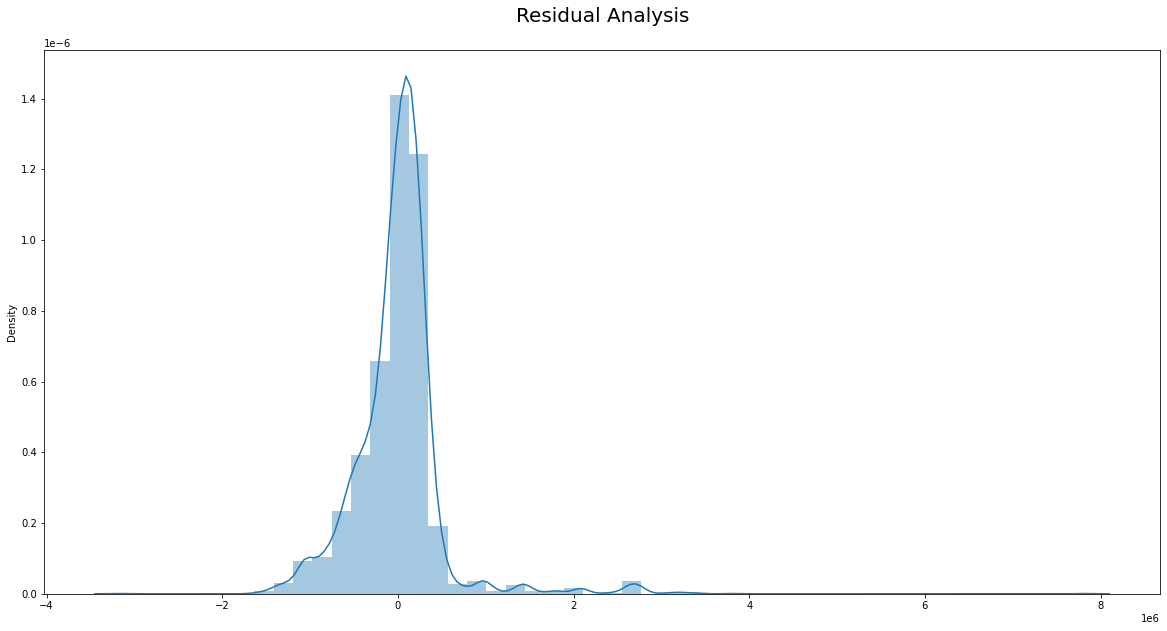

In [79]:
residual = y_train - y_train_pred

plt.figure(figsize=[20,10])
sns.distplot(residual)
plt.title('Residual Analysis\n', fontdict={'size':20})
plt.show()

__The Error terms are normally distributed at mean = 0, Looks perfect!__ 

## Step-6: Model Prediction on Test set

In [80]:
df_test.head()

,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,year_2015,year_2016,year_2017,year_2018,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
7406,445000,100000,25.8000,1498.0000,98.6000,5.0000,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
3896,411000,25000,23.1000,998.0000,67.0400,5.0000,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
4806,490000,90000,12.0500,2179.0000,120.0000,8.0000,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
6915,360000,110000,16.7800,1496.0000,88.7300,5.0000,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4930,40000,80000,16.1000,796.0000,37.0000,4.0000,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0


### Re-Scaling features : StandardScaler

In [81]:
scaling_cols = ['km_driven','mileage(km/ltr/kg)','engine','max_power','seats']
df_test[scaling_cols] = scaler.transform(df_test[scaling_cols])
df_test.head()

,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,year_2015,year_2016,year_2017,year_2018,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
7406,445000,0.0424,0.6143,0.2933,0.1792,0.2500,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
3896,411000,0.0106,0.5500,0.1255,0.0932,0.2500,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
4806,490000,0.0381,0.2869,0.5218,0.2375,0.5000,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
6915,360000,0.0466,0.3995,0.2926,0.1523,0.2500,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4930,40000,0.0339,0.3833,0.0577,0.0114,0.1667,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0


__Creating X & y variables__

In [82]:
y_test = df_test.pop('selling_price')
X_test = df_test

Since, we have elminated many variables/features using RFE & Manual Elimination methods, we can select only required columns based on lr_model2

In [83]:
X_test = X_test[X_train.columns]
X_test.head()

,km_driven,mileage(km/ltr/kg),engine,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,fuel_Petrol,seller_type_Dealer,seller_type_Trustmark Dealer,transmission_Automatic,owner_First Owner,owner_Test Drive Car
7406,0.0424,0.6143,0.2933,0,0,0,0,0,0,0,0,0,0,1,0
3896,0.0106,0.5500,0.1255,0,1,0,0,0,0,1,0,0,0,0,0
4806,0.0381,0.2869,0.5218,0,0,0,0,0,0,0,0,0,0,0,0
6915,0.0466,0.3995,0.2926,1,0,0,0,0,0,1,0,0,0,0,0
4930,0.0339,0.3833,0.0577,0,0,0,0,0,0,1,0,0,0,1,0


In [84]:
X_test_sm = sm.add_constant(X_test)
X_test_sm

,const,km_driven,mileage(km/ltr/kg),engine,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,fuel_Petrol,seller_type_Dealer,seller_type_Trustmark Dealer,transmission_Automatic,owner_First Owner,owner_Test Drive Car
7406,1.0000,0.0424,0.6143,0.2933,0,0,0,0,0,0,0,0,0,0,1,0
3896,1.0000,0.0106,0.5500,0.1255,0,1,0,0,0,0,1,0,0,0,0,0
4806,1.0000,0.0381,0.2869,0.5218,0,0,0,0,0,0,0,0,0,0,0,0
6915,1.0000,0.0466,0.3995,0.2926,1,0,0,0,0,0,1,0,0,0,0,0
4930,1.0000,0.0339,0.3833,0.0577,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1.0000,0.0386,0.5367,0.2591,0,0,0,0,0,0,0,0,0,0,1,0
5198,1.0000,0.0381,0.5224,0.1919,0,0,0,0,0,0,0,0,0,0,1,0
2876,1.0000,0.0307,0.5548,0.4564,0,0,0,0,0,0,0,0,0,1,0,0
818,1.0000,0.0381,0.4690,0.0577,0,0,0,0,0,0,1,0,0,0,0,0


__Model Prediction__

In [85]:
y_test_pred = lr_model11.predict(X_test_sm)
y_test_pred

7406    470709.9420
3896    270495.9426
4806    626040.4445
6915    326395.6735
4930   -183560.0650
           ...     
1304    360171.2294
5198    228179.1553
2876   1508378.9119
818    -166761.6854
2297    973314.7752
Length: 2372, dtype: float64

### Test values Vs Predicted values

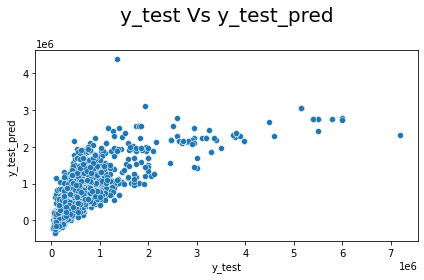

In [86]:
sns.scatterplot(x=y_test,y=y_test_pred)
plt.title('y_test Vs y_test_pred\n', fontsize=20)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.tight_layout()

__From the above we can see that there is good Linear relationship/Pattern__

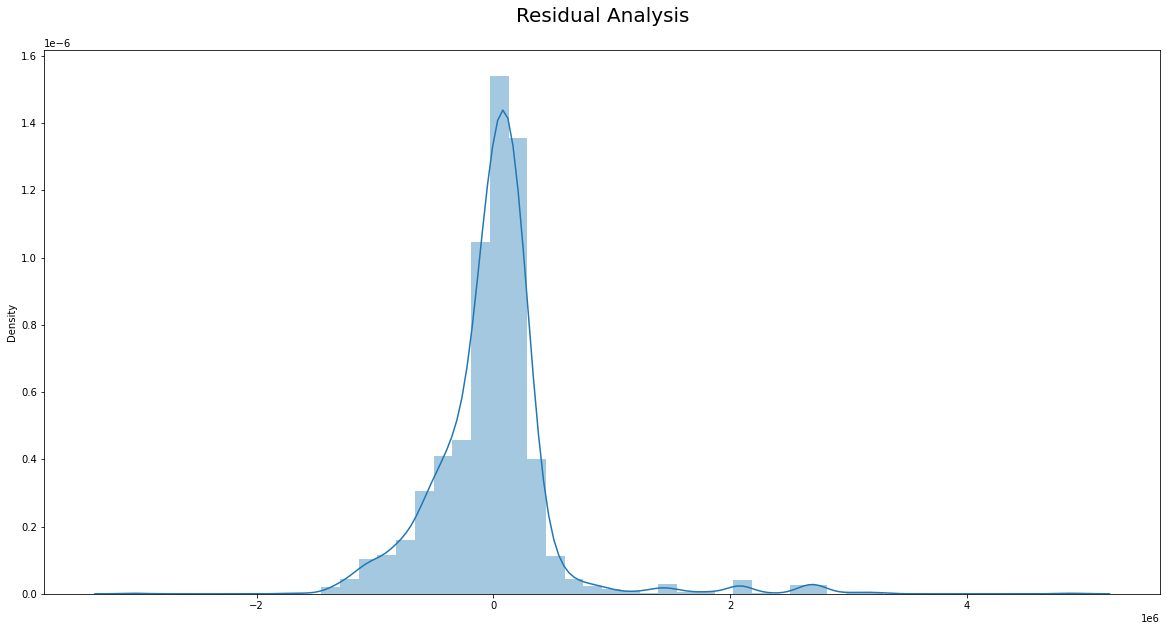

In [92]:
residual_test = y_test - y_test_pred

plt.figure(figsize=[20,10])
sns.distplot(residual_test)
plt.title('Residual Analysis\n', fontdict={'size':20})
plt.show()

__Looks Normally distribute where mean at center is 0__

## Step-7: Model Evaluation using Statistics

In [87]:
train_r_squared = r2_score(y_train,y_train_pred)

# number of rows
N_train = X_train.shape[0]

#number of features
P_train = X_train.shape[1]


train_adj_r_squared = round(1 - (1-train_r_squared)*(N_train-1)/(N_train-P_train-1),3)
train_adj_r_squared

0.603

In [88]:
test_r_squared = r2_score(y_test,y_test_pred)

# number of rows
N_test = X_test.shape[0]

#number of features
P_test = X_test.shape[1]


test_adj_r_squared = round(1 - (1-test_r_squared)*(N_test-1)/(N_test-P_test-1),3)
test_adj_r_squared

0.599

In [89]:
stats_data = [['Train_Data',round(train_r_squared,3),train_adj_r_squared],['Test_Data',round(test_r_squared,3),test_adj_r_squared]]
final_stats = pd.DataFrame(stats_data,columns=['Data Category','R2_Value','Adjusted_R2_Value'])
final_stats

,Data Category,R2_Value,Adjusted_R2_Value
0,Train_Data,0.6040,0.6030
1,Test_Data,0.6020,0.5990


## Final Model:

In [90]:
pd.options.display.float_format = '{:.2f}'.format
lr_model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     562.3
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:33:57   Log-Likelihood:                -80581.
No. Observations:                5534   AIC:                         1.612e+05
Df Residuals:                    5518   BIC:                         1.613e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         -4.57e+05   7.15e+04     -6.395      0.000   -5.97e+05   -3.17e+05
km_driven                    -1.982e+06   3.13e+05     -6.332      0.000    -2.6e+06   -1.37e+06
mileage(km/ltr/kg)            7.159e+05    1.1e+05      6.483      0.000    4.99e+05    9.32e+05
engine                        1.827e+06   7.19e+04     25.422      0.000    1.69e+06    1.97e+06
year_2015                     1.306e+05   2.51e+04      5.210      0.000    8.15e+04     1.8e+05
year_2016                     2.009e+05   2.49e+04      8.063      0.000    1.52e+05     2.5e+05
year_2017                     3.566e+05   2.44e+04     14.620      0.000    3.09e+05    4.04e+05
year_2018                     3.336e+05   2.71e+04     12.312      0.000     2.8e+05    3.87e+05
year_2019                     8.987e+05   3.17e+04     28.311      0.000    8.36e+05    9.61e+05
year_2020                     2.729e+05   7.09e+04      3.849      0.000    1.34e+05    4.12e+05
fuel_Petrol                  -7.538e+04   1.99e+04     -3.791      0.000   -1.14e+05   -3.64e+04
seller_type_Dealer            3.639e+05   2.21e+04     16.453      0.000     3.2e+05    4.07e+05
seller_type_Trustmark Dealer -2.325e+05   4.16e+04     -5.590      0.000   -3.14e+05   -1.51e+05
transmission_Automatic        7.954e+05    2.4e+04     33.082      0.000    7.48e+05    8.43e+05
owner_First Owner             3.617e+04   1.68e+04      2.158      0.031    3306.051     6.9e+04
owner_Test Drive Car          2.671e+06   2.58e+05     10.350      0.000    2.16e+06    3.18e+06
==============================================================================
Omnibus:                     3265.413   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            95359.681
Skew:                           2.299   Prob(JB):                         0.00
Kurtosis:                      22.809   Cond. No.                         66.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
pd.options.display.float_format = '{:.2f}'.format
lr_model11.params/100000

const                           -4.57
km_driven                      -19.82
mileage(km/ltr/kg)               7.16
engine                          18.27
year_2015                        1.31
year_2016                        2.01
year_2017                        3.57
year_2018                        3.34
year_2019                        8.99
year_2020                        2.73
fuel_Petrol                     -0.75
seller_type_Dealer               3.64
seller_type_Trustmark Dealer    -2.32
transmission_Automatic           7.95
owner_First Owner                0.36
owner_Test Drive Car            26.71
dtype: float64

### Conclusions:

1. The selling price of the car is affected by km_driven parameter, where more the kilometers the car is driven the less the selling price of the car.
2. The variables engine(CC) & owner_Test Drive Car is majorly impacting the selling price of the car, as per our linear model, more than 35%  of the selling price is explained/impacted by engine(CC) & owner_Test Drive Car attributes of the car.
3. Although Mileage & Engine CC contribute decently to the selling price of the car.
4. Cars with Model-Year or manufactured-year between __2018-2020__ will have major effect in the selling_price of the car, especially the Cars manufactured in the year 2019 will tend to have high selling price
